# Step 1: HI Construction
1. Normalization & feature selection
2. Noise reduction (Gaussian filter)
3. Dimension reduction (PCA)

## 1 Import library

In [1]:
import pandas as pd
import numpy as np
import os
import time
import csv
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.decomposition import PCA

## 2 Load data

### 2.1 Set constant data

In [2]:
file_path = '0_raw_data/'
file_no = '1'
train_file = file_path+'train_FD00'+file_no+'.txt'
test_file = file_path+'test_FD00'+file_no+'.txt'
test_rul_file = file_path+'RUL_FD00'+file_no+'.txt'
n_ftrs = 26
op_col_name = [ 'setting1', 'setting2', 'setting3']
ftr_col_name = [ 's1', 's2', 's3','s4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
             's15', 's16', 's17', 's18', 's19', 's20', 's21']
col_name = ['id', 'cycle'] + op_col_name+ ftr_col_name
n_op = 1

### 2.2 Read data

In [13]:
# read training data - It is the aircraft engine run-to-failure data.
raw_train_df = pd.read_csv(train_file,names = col_name, header=None,delim_whitespace=True,index_col=0)
raw_test_df = pd.read_csv(test_file,names = col_name, header=None,delim_whitespace=True,index_col=0)
raw_rul_df = pd.read_csv(test_rul_file, names=['RUL'],header=None,delim_whitespace=True) 

In [14]:
train_df = raw_train_df
test_df = raw_test_df
rul_df = raw_rul_df

In [15]:
n_train_units = len(train_df.groupby('id').size())
n_test_units = len(test_df.groupby('id').size())
n_test_units

100

In [11]:
train_df

,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
id,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,21.61,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,21.61,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066


## 3 Preprocess

### 3.1 Normalization

In [17]:
scaler = preprocessing.StandardScaler()
train_df[ftr_col_name] = pd.DataFrame(scaler.fit_transform(train_df[ftr_col_name]), 
                                                        columns=ftr_col_name, 
                                                        index=train_df.index)

In [18]:
test_df[ftr_col_name] = pd.DataFrame(scaler.transform(test_df[ftr_col_name]), 
                                                        columns=ftr_col_name, 
                                                        index=test_df.index)

### 3.2 Calculate RUL

In [19]:
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index() #添加一列作为索引
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)

In [20]:
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index() 
rul.columns = ['id', 'max']
rul_df.columns = ['more']
rul_df['id'] = rul_df.index + 1 # 获得每个发动机的编号
rul_df['max'] = rul['max'] + rul_df['more'] # 测试数据的生命周期=发动机的运行时间+剩余寿命
rul_df.drop('more', axis=1, inplace=True)

# generate RUL for test data
test_df = test_df.merge(rul_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
#test_df['percent'] = test_df['cycle']/test_df['max']
test_df.drop('max', axis=1, inplace=True)

### 3.3 Piecewise RUL

### 3.4 Drop rebundant features

In [10]:
#rebundant_ftr_name = ['s1','s5','s6','s10','s16','s17','s18','s19','setting1','setting2','setting3']
rebundant_ftr_name = ['s1','s5','s6', 's8', 's9','s10', 's13', 's14','s16','s17','s18','s19', 's20', 's21','setting1','setting2','setting3']

In [11]:
#train_df =train_df.loc[:,selected_ftr_name]
train_df.drop(rebundant_ftr_name, axis=1, inplace=True)
#train_df.head()

In [12]:
test_df.drop(rebundant_ftr_name, axis=1, inplace=True)

In [13]:
selected_ftr_name = train_df.columns.difference(['id','cycle','RUL'])
selected_ftr_name

Index(['s11', 's12', 's15', 's2', 's3', 's4', 's7'], dtype='object')

## 4 Noise reduction

### 4.1 Gaussian filter

In [14]:
def smoothGaussian(data,n_units,ftr_col_name,sigma):
    data_group = data.groupby(data['id'])
    ewm_ftr = pd.DataFrame()
    for unit_no in range(1,n_units+1):
        #print(unit_no)
        tmp_unit = data_group.get_group(unit_no)
        tmp_unit1 = pd.DataFrame(columns = ftr_col_name)
        #print(tmp_unit.index)
        for col in ftr_col_name:
            #print(tmp_unit[col])
            tmp_unit1[col] = gaussian_filter1d(tmp_unit.loc[:,col],sigma)
        tmp_unit1.reindex(index=tmp_unit.index)
        #print(tmp_unit1)
        #print(len(tmp_unit1[col]),len(tmp_unit[col]))
        #print(tmp_unit[ftr_col_name])
        #print(tmp_unit1)
        #col = 's7'
        #plt.plot(tmp_unit1[col])
        #plt.plot(tmp_unit[col])
        #plt.show()
        ewm_ftr = pd.concat([ewm_ftr,tmp_unit1],ignore_index=True)#ewm_ftr.append(tmp_unit1)
        #print(ewm_ftr)
    ewm_ftr['id'] = data['id']
    ewm_ftr['cycle'] = data['cycle']
    ewm_ftr['RUL'] = data['RUL']
    ewm_ftr = ewm_ftr.reset_index(drop=True)
    return ewm_ftr

In [15]:
#ewm_win_size = 10
gauss_sigma = 3
ewm_train_ftr = pd.DataFrame()
ewm_train_ftr = smoothGaussian(train_df, n_train_units, selected_ftr_name,gauss_sigma)
train_df = ewm_train_ftr

In [16]:
ewm_test_ftr = pd.DataFrame()
ewm_test_ftr = smoothGaussian(test_df, n_test_units, selected_ftr_name,gauss_sigma)
test_df = ewm_test_ftr

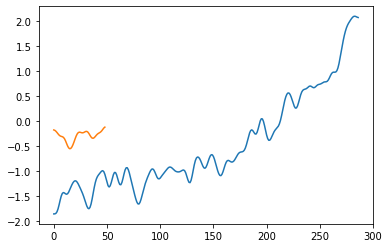

In [17]:
plt.plot(train_df.groupby('id').get_group(2)['s2'].reset_index(drop=True))
plt.plot(test_df.groupby('id').get_group(2)['s4'].reset_index(drop=True))
plt.show()

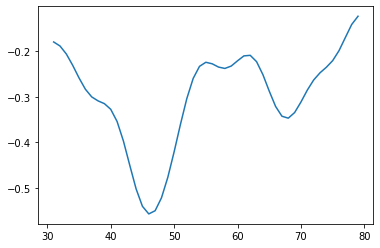

In [18]:
plt.plot(test_df.groupby('id').get_group(2)['s4'])

## 5 Dimension reduction

### 5.1 PCA

In [19]:
pca = PCA(n_components=3)
pca.fit(train_df[selected_ftr_name])
train_pca = pca.transform(train_df[selected_ftr_name])
test_pca = pca.transform(test_df[selected_ftr_name])
sum(pca.explained_variance_ratio_[:3])

0.984830049451563

In [20]:
train_df_pca = pd.DataFrame(train_pca,columns=['p1','p2','p3'])
train_df_pca['id'] = train_df['id']
train_df_pca['cycle'] = train_df['cycle']
train_df_pca['RUL'] = train_df['RUL']
train_df_pca.head()

,p1,p2,p3,id,cycle,RUL
0,-2.126821,0.318517,-0.327141,1,1,191
1,-2.163152,0.300596,-0.280954,1,2,190
2,-2.223635,0.269516,-0.204909,1,3,189
3,-2.289392,0.232458,-0.124344,1,4,188
4,-2.342838,0.195372,-0.062936,1,5,187


In [21]:
test_df_pca = pd.DataFrame(test_pca,columns=['p1','p2','p3'])
test_df_pca['id'] = test_df['id']
test_df_pca['cycle'] = test_df['cycle']
test_df_pca['RUL'] = test_df['RUL']
test_df_pca.head()

,p1,p2,p3,id,cycle,RUL
0,-2.122702,-0.078880,0.214282,1,1,142
1,-2.127717,-0.101507,0.195563,1,2,141
2,-2.139199,-0.140460,0.161077,1,3,140
3,-2.158443,-0.184302,0.115018,1,4,139
4,-2.184914,-0.219218,0.061473,1,5,138


In [22]:
pca.explained_variance_ratio_[:3]

array([0.96859157, 0.01006784, 0.00617064])

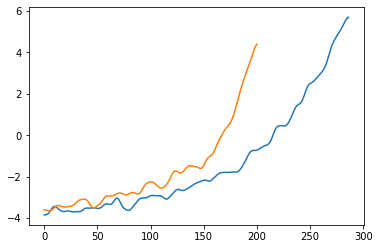

In [23]:
for j in [2,9]:#range(1,10):
    plt.plot(train_df_pca.groupby('id').get_group(j).reset_index(drop=True)['p1'])
#plt.legend([str(i) for i in range(1,10)])
plt.show()

D:\Env\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


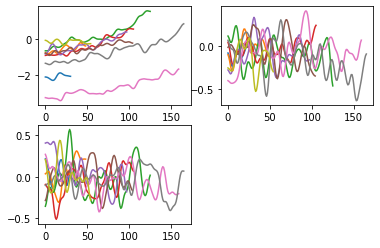

In [24]:
for j in range(1,10):
    for i in range(3):
        plt.subplot(2,2,i+1)
        plt.plot(test_df_pca.groupby('id').get_group(j).reset_index(drop=True)['p'+str(i+1)])
plt.show()

In [25]:
train_group = train_df_pca.groupby('id')
test_group = test_df_pca.groupby('id')

In [26]:
pca_remain_col = train_df_pca.columns.difference(['p2','p3'])
pca_remain_col

Index(['RUL', 'cycle', 'id', 'p1'], dtype='object')

### 6 Save HI

In [27]:
processed_data_file = '1_processed_data'
if os.path.exists(processed_data_file)==False:
    os.makedirs(processed_data_file)

In [28]:
train_df_pca.to_csv(processed_data_file+'/train_PCA_data.csv',index=False,header=True)

In [29]:
test_df_pca.to_csv(processed_data_file+'/test_PCA_data.csv',index=False,header=True)